# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

In [ ]:
!unzip /content/Assignment4Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Assignment four data Yelp (question 1 and 2)/yelp_dataset~0.json  
  inflating: Assignment four data Yelp (question 1 and 2)/yelp_dataset~1.json  
  inflating: Assignment four data Yelp (question 1 and 2)/yelp_dataset~10.json  
  inflating: Assignment four data Yelp (question 1 and 2)/yelp_dataset~100.json  
  inflating: Assignment four data Yelp (question 1 and 2)/yelp_dataset~1000.json  
  inflating: Assignment four data Yelp (question 1 and 2)/yelp_dataset~1001.json  
  inflating: Assignment four data Yelp (question 1 and 2)/yelp_dataset~1002.json  
  inflating: Assignment four data Yelp (question 1 and 2)/yelp_dataset~1003.json  
  inflating: Assignment four data Yelp (question 1 and 2)/yelp_dataset~1004.json  
  inflating: Assignment four data Yelp (question 1 and 2)/yelp_dataset~1005.json  
  inflating: Assignment four data Yelp (question 1 and 2)/yelp_dataset~1006.json  
  inflating: Assignment four data Yelp (quest

In [ ]:
import os
if len(os.listdir('/content/Assignment four data Yelp (question 1 and 2)')) == 0:
    print("Directory is empty")
else:    
    print("Directory is not empty")

Directory is not empty


In [ ]:
len(os.listdir('/content/Assignment four data Yelp (question 1 and 2)'))

5000

In [ ]:
import glob

In [ ]:
import json

In [ ]:
rate = [ ]
text = [ ]
for files in glob.iglob('/content/Assignment four data Yelp (question 1 and 2)/*'):
  f=open(files)
  data=json.load(f)
  for y in data:
      rate.append(y['stars'])
      text.append(y['text'])

In [ ]:
data[:2]

[{'business_id': 'GI-CAiZ_Gg3h21PwrANB4Q',
  'cool': 1,
  'date': '2013-10-26 04:21:04',
  'funny': 0,
  'review_id': 'omgEgMNYwXXv2QwRv27Rhw',
  'stars': 4.0,
  'text': "It's everything you could want / expect in fine dining (aka expensive) restaurant.\n\nCan't really say much else that hasn't already been previously addressed. \n\nWe dined here tonight for my mom's early birthday celebration. My sister and I split a 20 oz bone in rib eye and my mom had grilled pacific swordfish. We also ordered sides of steamed broccoli and garlic mashed potatoes. Since it was her birthday, she got a free warm butter cake with a personal touch! \n\nThe food was good - although there was a wee bit of over-charred areas on the steak and the butter cake was also a bit too sweet (maybe my taste buds are too sensitive now).\n\nOverall it was a good dining experience. Would I come back..? Maybe after I've experienced other fine dining places.",
  'useful': 2,
  'user_id': '3l5lrs0_voc3cZz_UiLeZA'},
 {'busi

In [ ]:
print('Texts:',len(text))
print('Ratings:', len(rate))

Texts: 500000
Ratings: 500000


Data Cleaning and Transformation

In [ ]:
#Using function to create dictionary for Topic Model
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=8a495871cd64c777b70f2a8d5a42c164e2c2c5b15121d4e31ed7f486e4360db7
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


# **Question 1: Topic Modeling**

(30 points). This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, **select two models** and write a python program to **identify the top 20 topics (with 15 words for each topic) in the dataset**. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1)   Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2)   Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3)   HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4)   SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5)   Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6)   LDA2VEC: https://github.com/cemoody/lda2vec

(7)   BERTopic: https://github.com/MaartenGr/BERTopic

(8)   LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9)   Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)


**The following information should be reported:**

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster. 

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis


In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
text_red = text[:20000]

What does LDA do?
LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

When I say topic, what is it actually and how it is represented?

A topic is nothing but a collection of dominant keywords that are typical representatives. Just by looking at the keywords, you can identify what the topic is all about.

The following are key factors to obtaining good segregation topics:

The quality of text processing.
The variety of topics the text talks about.
The choice of topic modeling algorithm.
The number of topics fed to the algorithm.
The algorithms tuning parameters.

In [ ]:
import re
# Remove Emails
text_red = [re.sub('\S*@\S*\s?', '', sent) for sent in text_red]

# Remove new line characters
text_red = [re.sub('\s+', ' ', sent) for sent in text_red]

# Remove distracting single quotes
text_red = [re.sub("\'", "", sent) for sent in text_red]

print(text_red[:1])

['Awesome service and fantastic food, the wait staff are friendly and accommodating. They food is ways good when I come in.']


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(text_red))

print(data_words[:1])

[['awesome', 'service', 'and', 'fantastic', 'food', 'the', 'wait', 'staff', 'are', 'friendly', 'and', 'accommodating', 'they', 'food', 'is', 'ways', 'good', 'when', 'come', 'in']]


Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['awesome', 'service', 'and', 'fantastic', 'food', 'the', 'wait', 'staff', 'are', 'friendly', 'and', 'accommodating', 'they', 'food', 'is', 'ways', 'good', 'when', 'come', 'in']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
import spacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['awesome', 'service', 'fantastic', 'food', 'wait', 'staff', 'friendly', 'accommodate', 'food', 'way', 'good', 'come']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]]


Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, word id 1 occurs twice and so on.

This is used as the input by the LDA model.

If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.

In [ ]:
id2word[0]

'accommodate'

Topic Model

Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior.

chunksize is the number of documents to be used in each training chunk. update_every determines how often the model parameters should be updated and passes is the total number of training passes.

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.078*"tell" + 0.067*"call" + 0.058*"customer" + 0.041*"hour" + 0.037*"help" + 0.032*"say" + 0.032*"manager" + 0.027*"care" + 0.022*"problem" + 0.020*"employee"'), (1, '0.050*"decent" + 0.037*"bite" + 0.027*"write" + 0.024*"slice" + 0.024*"deliver" + 0.023*"basically" + 0.023*"shrimp" + 0.022*"delivery" + 0.021*"totally" + 0.020*"together"'), (2, '0.071*"high" + 0.046*"local" + 0.037*"game" + 0.031*"fine" + 0.026*"pass" + 0.021*"rest" + 0.019*"downtown" + 0.019*"decor" + 0.017*"healthy" + 0.015*"pork_belly"'), (3, '0.042*"go" + 0.036*"get" + 0.033*"time" + 0.030*"would" + 0.029*"come" + 0.023*"make" + 0.021*"back" + 0.016*"take" + 0.014*"give" + 0.014*"even"'), (4, '0.060*"look" + 0.053*"know" + 0.052*"see" + 0.049*"people" + 0.041*"s" + 0.029*"walk" + 0.026*"pay" + 0.026*"be" + 0.020*"put" + 0.018*"hotel"'), (5, '0.083*"location" + 0.080*"new" + 0.033*"able" + 0.032*"wonderful" + 0.030*"real" + 0.026*"cocktail" + 0.024*"read" + 0.015*"save" + 0.015*"recently" + 0.015*"avoid"'), 

Topic 0: **store**

(0, '0.083*"pizza" + 0.056*"store" + 0.054*"buy" + 0.046*"shop" + 0.040*"must" + 0.034*"parking" + 0.027*"weekend" + 0.022*"product" + 0.022*"fan" + 0.022*"purchase"')

Topic 1: **combo**

(1, '0.047*"sandwich" + 0.046*"add" + 0.040*"already" + 0.029*"taco" + 0.028*"one" + 0.026*"shrimp" + 0.024*"tea" + 0.019*"honestly" + 0.018*"exactly" + 0.017*"mom"')

Topic 2: **job details**

(2, '0.077*"help" + 0.057*"job" + 0.029*"professional" + 0.024*"pool" + 0.022*"relax" + 0.019*"cafe" + 0.017*"knowledgeable" + 0.017*"detail" + 0.017*"massage" + 0.015*"begin"')

Topic 3: **offers**

(3, '0.062*"beer" + 0.061*"selection" + 0.046*"decent" + 0.032*"slow" + 0.027*"beautiful" + 0.021*"patio" + 0.020*"space" + 0.018*"discount" + 0.016*"attention" + 0.014*"low"')

Topic 4: **place**

(4, '0.069*"good" + 0.063*"place" + 0.059*"food" + 0.049*"great" + 0.043*"service" + 0.029*"really" + 0.029*"try" + 0.026*"come" + 0.025*"be" + 0.025*"also"')

Topic 5: **parking**

(5, '0.084*"car" + 0.054*"part" + 0.046*"dog" + 0.028*"park" + 0.028*"play" + 0.019*"loud" + 0.018*"bottle" + 0.016*"wear" + 0.016*"repair" + 0.016*"suck"')

Topic 6: **delivery**

(6, '0.046*"pick" + 0.037*"turn" + 0.031*"phone" + 0.024*"horrible" + 0.020*"deliver" + 0.019*"hold" + 0.019*"ready" + 0.018*"counter" + 0.016*"management" + 0.013*"min"')

Topic 7: **reservation**

(7, '0.104*"order" + 0.048*"wait" + 0.037*"drink" + 0.035*"table" + 0.033*"come" + 0.030*"friend" + 0.028*"night" + 0.027*"enjoy" + 0.027*"bar" + 0.024*"dinner"')

Topic 8: **vacation**

(8, '0.055*"door" + 0.039*"trip" + 0.032*"early" + 0.029*"forget" + 0.027*"smell" + 0.025*"write" + 0.023*"head" + 0.020*"card" + 0.019*"update" + 0.015*"healthy"')

Topic 9: **Choice**

(9, '0.078*"favorite" + 0.056*"town" + 0.045*"happy" + 0.044*"local" + 0.039*"cool" + 0.026*"game" + 0.016*"impressed" + 0.015*"addition" + 0.012*"joint" + 0.010*"suggestion"')

Topic 10: **salary**

(10, '0.119*"take" + 0.092*"want" + 0.082*"ask" + 0.065*"tell" + 0.043*"pay" + 0.039*"hour" + 0.026*"care" + 0.025*"manager" + 0.018*"spend" + 0.015*"rude"')

Topic 11: **iterinary**

(11, '0.111*"call" + 0.050*"do" + 0.050*"week" + 0.049*"family" + 0.047*"show" + 0.032*"month" + 0.032*"later" + 0.028*"issue" + 0.022*"appointment" + 0.020*"book"')

Topic 12: **critics**

(12, '0.053*"taste" + 0.046*"chicken" + 0.045*"dish" + 0.038*"sauce" + 0.035*"hot" + 0.032*"flavor" + 0.028*"meat" + 0.023*"tasty" + 0.022*"sweet" + 0.022*"fish"')

Topic 13: **commands**

(13, '0.053*"go" + 0.040*"time" + 0.037*"get" + 0.036*"would" + 0.027*"make" + 0.023*"say" + 0.020*"back" + 0.018*"give" + 0.018*"even" + 0.017*"could"')

Topic 14: **cusine**

(14, '0.081*"lunch" + 0.041*"treat" + 0.041*"today" + 0.033*"italian" + 0.031*"size" + 0.024*"pleasant" + 0.023*"perfectly" + 0.023*"sell" + 0.021*"interesting" + 0.021*"sometimes"')

Topic 15: **discount**

(15, '0.037*"offer" + 0.026*"free" + 0.025*"else" + 0.016*"chocolate" + 0.015*"mean" + 0.014*"notice" + 0.014*"cake" + 0.014*"type" + 0.014*"there" + 0.013*"prepare"')

Topic 16: **convenience**

(16, '0.069*"room" + 0.057*"clean" + 0.049*"stay" + 0.038*"use" + 0.033*"hotel" + 0.027*"cut" + 0.025*"helpful" + 0.024*"hair" + 0.019*"check" + 0.018*"lady"')

Topic 17: **Eatery**

(17, '0.038*"restaurant" + 0.032*"little" + 0.024*"meal" + 0.022*"eat" + 0.021*"small" + 0.020*"side" + 0.019*"serve" + 0.018*"server" + 0.018*"much" + 0.018*"bit"')

Topic 18: **savings**

(18, '0.048*"quick" + 0.041*"deal" + 0.041*"ill" + 0.032*"fix" + 0.026*"understand" + 0.022*"continue" + 0.022*"yet" + 0.021*"pass" + 0.020*"totally" + 0.019*"process"')

Topic 19: **weather**

(19, '0.098*"super" + 0.072*"awesome" + 0.069*"atmosphere" + 0.065*"perfect" + 0.063*"burger" + 0.051*"cheap" + 0.051*"kid" + 0.035*"nail" + 0.030*"meet" + 0.028*"hit"')


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.331230 -0.122109       1        1  28.906913
14     0.268411  0.116688       2        1  18.384658
6      0.144003  0.290795       3        1   8.190603
4      0.134343 -0.157490       4        1   6.492910
12     0.028283  0.090107       5        1   4.419025
0      0.107478 -0.260946       6        1   3.793567
17    -0.016631  0.084254       7        1   3.746338
8      0.020276  0.091316       8        1   3.644921
18    -0.025689  0.015011       9        1   3.333715
5     -0.072922 -0.009357      10        1   2.226617
19    -0.071344 -0.011801      11        1   2.195371
11    -0.077675 -0.007001      12        1   2.018030
9     -0.081524 -0.011757      13        1   1.962906
1     -0.083886 -0.009420      14        1   1.871959
2     -0.094758 -0.011200      15        1   1.672120
15    -0.093377 -0.012883      16        1   1.622711
10    -0.100920 -0.017254      17        1   1.437425
13    -0.100575 -0.012721      18        1   1.414003
7     -0.105843 -0.025266      19        1   1.358552
16    -0.108878 -0.018966      20        1   1.307658, topic_info=            Term          Freq         Total Category  logprob  loglift
6           good  11785.000000  11785.000000  Default  30.0000  30.0000
21         place  10510.000000  10510.000000  Default  29.0000  29.0000
4           food   9675.000000   9675.000000  Default  28.0000  28.0000
78         great   8071.000000   8071.000000  Default  27.0000  27.0000
19            go  10669.000000  10669.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
2499      winter     78.182679     79.087598  Topic20  -4.9920   4.3254
2349  flavourful     77.601128     78.506047  Topic20  -4.9995   4.3253
2416      instal     76.643569     77.548488  Topic20  -5.0119   4.3252
3472     program     73.354848     74.259766  Topic20  -5.0558   4.3247
2446     stylist     70.967734     71.872653  Topic20  -5.0889   4.3243

[672 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
703      10  0.998834        able
582      18  0.992081      actual
2610      6  0.995141  additional
797      13  0.996053     address
1550     17  0.990521       adult
...     ...       ...         ...
869       4  0.998123       wrong
252       5  0.999170        year
870       6  0.993268   yesterday
153      12  0.995800       young
1330      9  0.996542       yummy

[678 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 15, 7, 5, 13, 1, 18, 9, 19, 6, 20, 12, 10, 2, 3, 16, 11, 14, 8, 17])

**LDA2VEC**

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 4.7MB 5.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301744 sha256=dfacde5e28a02647f74f7006c9bb6b41b4d880d0f374a5653dad23410d209d70
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 71kB 4.2MB/s 
     |████████████████████████████████| 1.3MB 7.6MB/s 
     |████████████████████████████████| 890kB 16.6MB/s 
     |████████████████████████████████| 2.9MB 26.2MB/s 
     |████████████████████████████████| 1.1MB 42.9MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.9-cp36-none-any.whl size=101036 sha256=cd73aee1e76550fea12039e7291dcfb70a9c7545b2267543711867562002c98d
  Stored in directory: /root/.cache/pip/wheels/fc/89/43/f2f5bc00b03ef9724b0f6254a97eaf159a4c4ddc024b33e07a
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=0ac148aae778df9766dbfd484d0e255d80caf5d23dfa0738ff9ab67efb77871e
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
import numpy as np
import pandas as pd

import umap
import hdbscan
from sentence_transformers import SentenceTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import matplotlib.pyplot as plt


def c_tf_idf(documents, m, ngram_range=(1, 1)):
    """ Calculate a class-based TF-IDF where m is the number of total documents. """
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

In [ ]:
data = text_red[:5000]

In [ ]:
%%time
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(data, show_progress_bar=True)

100%|██████████| 245M/245M [02:10<00:00, 1.88MB/s]



CPU times: user 12min 43s, sys: 6.1 s, total: 12min 49s
Wall time: 14min 53s


In [ ]:
%%time
umap_embeddings = umap.UMAP(n_neighbors=10,
                            n_components=5,
                            min_dist=0.0,
                            metric='cosine',
                            random_state=42).fit_transform(embeddings)

CPU times: user 25.4 s, sys: 216 ms, total: 25.6 s
Wall time: 25.5 s


In [ ]:

%%time
cluster = hdbscan.HDBSCAN(min_cluster_size=30,
                          metric='euclidean',
                          cluster_selection_method='eom', 
                          prediction_data=True).fit(umap_embeddings)

CPU times: user 265 ms, sys: 0 ns, total: 265 ms
Wall time: 270 ms


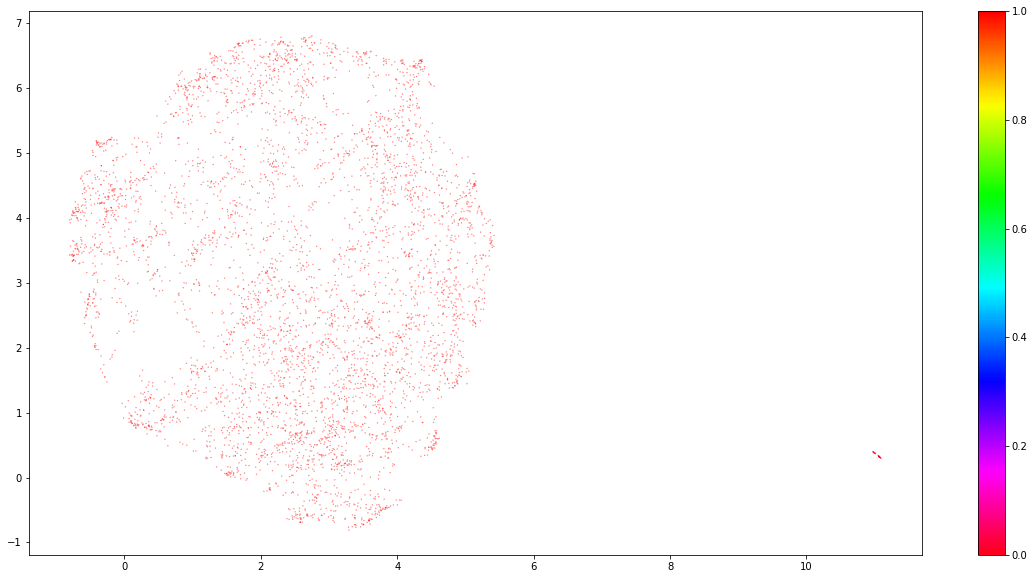

In [ ]:
# Prepare data
umap_data = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()
# plt.savefig("result1.png", dpi = 300)

In [ ]:
docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [ ]:
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m = len(data))

In [ ]:
top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
1,1,4960
0,0,40


In [ ]:
top_n_words

{0: [('et', 0.12445725091713702),
  ('le', 0.09223821596633464),
  ('la', 0.08781816295713962),
  ('pour', 0.0778195538681395),
  ('est', 0.07034231211302365),
  ('des', 0.06274896697999713),
  ('les', 0.06274896697999713),
  ('que', 0.05866392763806218),
  ('en', 0.05640762272890593),
  ('une', 0.053863827866058756),
  ('pas', 0.053863827866058756),
  ('mais', 0.051947483131973136),
  ('du', 0.04963870800143723),
  ('très', 0.046075861633048804),
  ('je', 0.042048588949138536),
  ('qui', 0.042048588949138536),
  ('avec', 0.037918687926331775),
  ('bon', 0.03710169613159282),
  ('cest', 0.03672859943550961),
  ('ne', 0.03462824972281998)],
 1: [('just', 0.007513616810580724),
  ('like', 0.00749624082151475),
  ('time', 0.007484515176294867),
  ('service', 0.007454934450235309),
  ('great', 0.0073854897271420335),
  ('really', 0.007108822086764938),
  ('place', 0.007092572007162017),
  ('good', 0.00707308178376454),
  ('food', 0.006965960847964733),
  ('got', 0.006505224029294492),
  ('

**Topic -1:** This is related to **Restaurant service**

**Topic 0:** This is related to **Japanese cusine**

**Topic 1:** This is related to **Lodge Service**

**Topic 2:** This is related to **Bar**

**Topic 3:** This is related to **Western**

**Topic 4:** This is related to **Restaurant**

**Topic 5:** This is related to **Deserts**

**Topic 6:** This is related to **Cusines**

**Topic 7:** This is related to **Ambience**

**Topic 8:** This is related to **Good Salon**

**Topic 9:** This is related to **Bad Food**

**Topic 10:** This is related to **Bad Experience**

**Topic 11:** This is related to **Automobile Review**

**Topic 12:** This is related to **Car Service**

# **Question 2: Yelp Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.

The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0 

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples. 

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can. 

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
import glob
import json
import pandas as pd
rate = [ ]
text = [ ]
for files in glob.iglob('/content/Assignment four data Yelp (question 1 and 2)/*'):
  f=open(files)
  data=json.load(f)
  for y in data:
      rate.append(y['stars'])
      text.append(y['text'])

In [ ]:
df = pd.DataFrame({'Reviews':text,'Ratings':rate})

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['Reviews'] = df['Reviews'].apply(lambda x: x.lower())
df['Reviews_rpunc'] = df['Reviews'].str.replace('[^\w\s]','')

In [ ]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from nltk import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['Reviews_token'] = df['Reviews_rpunc'].apply(lambda x: word_tokenize(x))
df['Reviews_stop'] = df['Reviews_token'].apply(lambda x: [i for i in x if i not in stopword])
df['Reviews_lemma'] = df['Reviews_stop'].apply(lambda x: [wnl.lemmatize(i) for i in x])
df['Reviews_lemma'] = df['Reviews_lemma'].apply(lambda x: ' '.join(map(str, x)) )

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import linear_model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
#train
X_tfidf = tfidf_vect.fit_transform(df['Reviews_lemma'])

In [ ]:
X = X_tfidf
y = df['Ratings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LinearSVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,y_pred))

Accuracy: 65.61%
              precision    recall  f1-score   support

         1.0       0.71      0.83      0.77     14160
         2.0       0.43      0.25      0.31      7996
         3.0       0.46      0.30      0.36     11123
         4.0       0.50      0.43      0.46     22601
         5.0       0.74      0.88      0.80     44120

    accuracy                           0.66    100000
   macro avg       0.57      0.54      0.54    100000
weighted avg       0.63      0.66      0.63    100000



In [ ]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,y_pred1))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 66.84%
              precision    recall  f1-score   support

         1.0       0.72      0.83      0.77     14160
         2.0       0.45      0.30      0.36      7996
         3.0       0.49      0.36      0.42     11123
         4.0       0.52      0.46      0.49     22601
         5.0       0.76      0.87      0.81     44120

    accuracy                           0.67    100000
   macro avg       0.59      0.56      0.57    100000
weighted avg       0.65      0.67      0.65    100000





```
# This is formatted as code
```

**Explanation:**


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
!unzip /content/assignment4-question3-data.zip

Archive:  /content/assignment4-question3-data.zip
  inflating: data_description.txt    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df_hpp_train = pd.read_csv('/content/train.csv')

In [ ]:
df_hpp_test = pd.read_csv('/content/test.csv')

In [ ]:
df_hpp_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_hpp_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_rows', None)

In [ ]:
print(df_hpp_train.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
import numpy as np
df_hpp_train = df_hpp_train.replace(np.NaN,0)

In [ ]:
print(df_hpp_train.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [ ]:
print(df_hpp_test.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
df_hpp_test = df_hpp_test.replace(np.NaN,0)

In [ ]:
print(df_hpp_test.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [ ]:
column = list(df_hpp_train.select_dtypes(['object']).columns)
column

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
df_hpp_train[column] = df_hpp_train[column].apply(lambda x: x.astype('category'))
df_hpp_train[column] = df_hpp_train[column].apply(lambda x: x.cat.codes)

In [ ]:
df_hpp_test[column] = df_hpp_test[column].apply(lambda x: x.astype('category'))
df_hpp_test[column] = df_hpp_test[column].apply(lambda x: x.cat.codes)

In [ ]:
correlate = df_hpp_train.corr(method='pearson')
print(correlate['SalePrice'])

Id              -0.021917
MSSubClass      -0.084284
MSZoning        -0.166872
LotFrontage      0.209624
LotArea          0.263843
Street           0.041036
Alley           -0.092607
LotShape        -0.255580
LandContour      0.015453
Utilities       -0.014314
LotConfig       -0.067396
LandSlope        0.051152
Neighborhood     0.210851
Condition1       0.091155
Condition2       0.007513
BldgType        -0.085591
HouseStyle       0.180163
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
RoofStyle        0.222405
RoofMatl         0.132383
Exterior1st      0.103551
Exterior2nd      0.103766
MasVnrType      -0.000488
MasVnrArea       0.472614
ExterQual       -0.636884
ExterCond        0.117303
Foundation       0.382479
BsmtQual        -0.438881
BsmtCond         0.147367
BsmtExposure    -0.193079
BsmtFinType1    -0.013233
BsmtFinSF1       0.386420
BsmtFinType2     0.130814
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF 

In [ ]:
feature_columns = ['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','ExterQual','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageCars','GarageArea']

In [ ]:
X = df_hpp_train[feature_columns]
Y = df_hpp_train['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
test = df_hpp_test[feature_columns]

In [ ]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()  
model3.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model3.score(X,Y)

0.805458256888209

In [ ]:
ypred = model3.predict(test)


In [ ]:
print(pd.DataFrame({'predicted Sale Prices':ypred}))



      predicted Sale Prices
0              91999.486628
1             146014.569048
2             152275.661837
3             181545.347071
4             196500.106334
5             153857.069497
6             158497.885998
7             155398.459222
8             183019.915481
9              95874.922281
10            210978.337755
11            110498.122287
12            105762.746474
13            157451.401366
14            111002.446453
15            337977.651615
16            238828.744656
17            296210.896086
18            281706.500820
19            422787.855119
20            277383.378846
21            218473.426600
22            175165.591563
23            182267.302808
24            194543.798194
25            202990.685406
26            261152.678357
27            243656.823185
28            179569.217661
29            211781.081294
30            198850.583748
31             78908.378585
32            189020.517707
33            268400.630490
34            266374